# Overview of Seaborn Plotting Functions

Most of your interactions with seaborn will happen though a set of plotting functions. Later chapters in the tutorial will explore the specific features offered by each function. This chapter will introduce, at high-level, the different tasks that you will encounter.

## Similar functions for similar tasks

The seaborn namespace is flat; all of the functionality is accessible at the top level. But the code itself is hierarchically structured, with modules of functions that achieve similar visualization goals through different means. Most of the docs are structured around these modules: you’ll encounter names like “relational”, “distributional”, and “categorical”.

For example, the distributions module defines functions that specialize in representing the distribution of datapoints. This includes familiar methods like the histogram:




<Axes: xlabel='flipper_length_mm', ylabel='Count'>

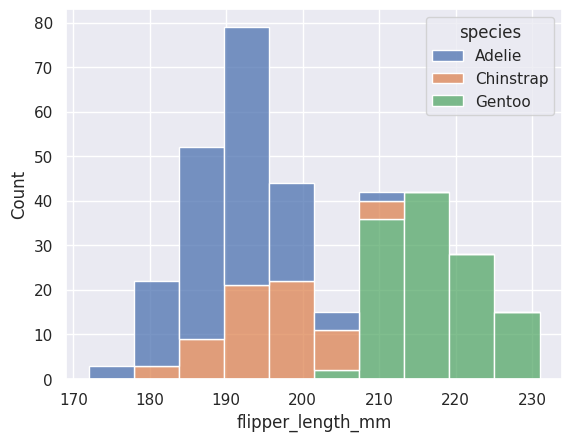

In [2]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.set_theme() # Default grid
sns.histplot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack")

Along with similar, but perhaps less familiar, options such as kernel density estimation:



<Axes: xlabel='flipper_length_mm', ylabel='Density'>

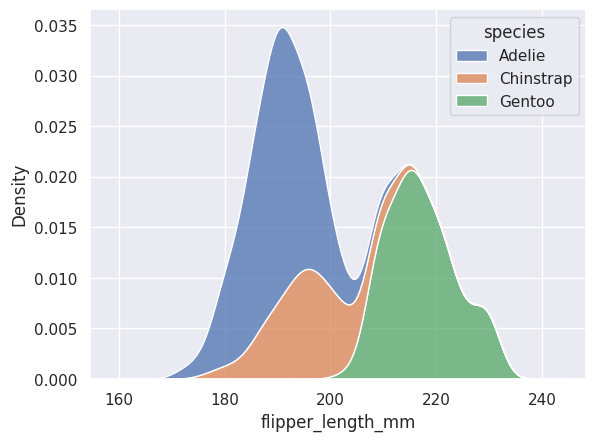

In [ ]:
sns.kdeplot(
    data=penguins,
    x="flipper_length_mm",
    hue="species", multiple="stack")

Functions within a module share a lot of underlying code and offer similar features that may not be present in other components of the library (such as *multiple*= *'stack'* in the examples above). They are designed to facilitate switching between different visual representations as you explore a dataset, because different representations often have complementary strengths and weaknesses.


## Figure-level vs. axes-level functions

In addition to the different modules, there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are **axes-level functions**. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:



In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Seaborn_graph_1.png to Seaborn_graph_1 (2).png


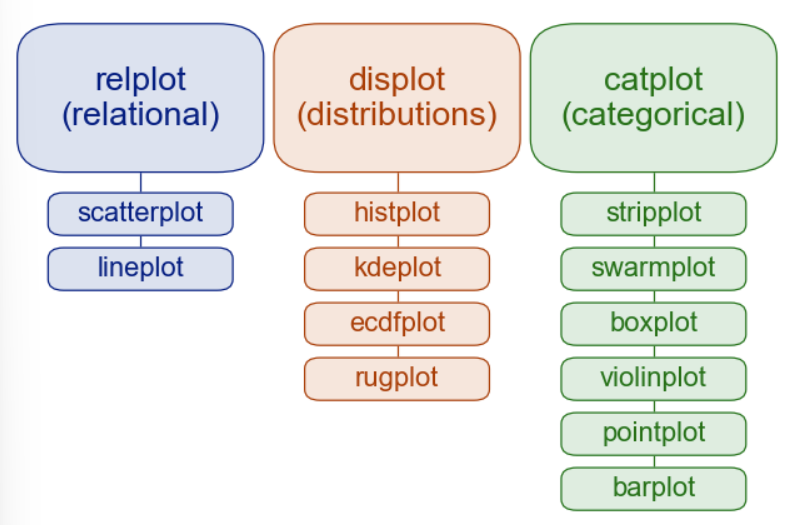

In [ ]:
Image('Seaborn_graph_1 (1).png', width = 550)

For example, **displot()** is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as **histplot()** behind the scenes:


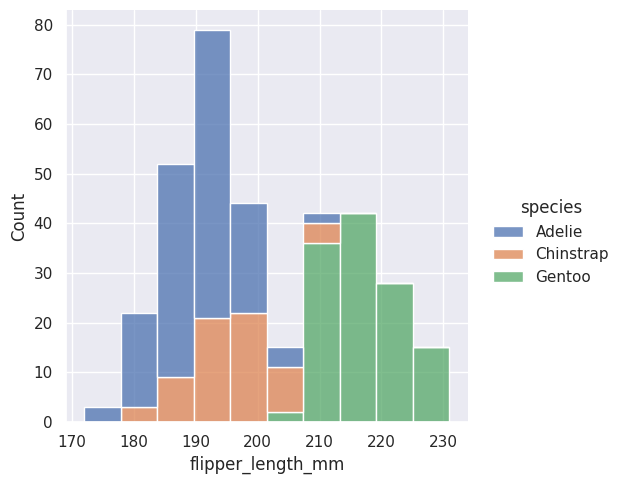

In [3]:
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack"
)

To draw a kernel density plot instead, using the same code as kdeplot(), select it using the *kind* parameter:


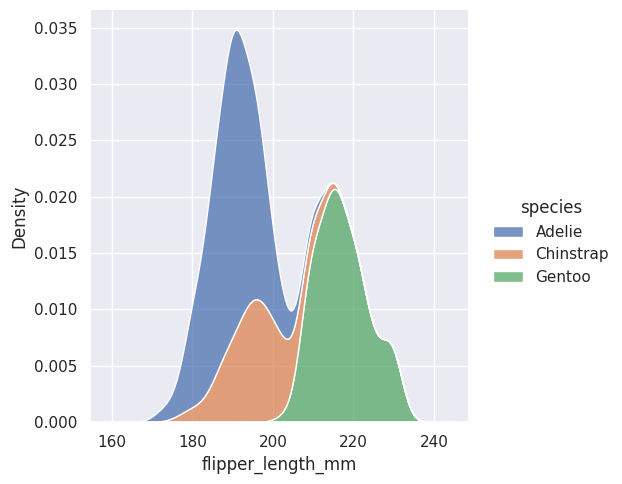

In [5]:
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack",
    kind="kde"
)

You’ll notice that the figure-level plots look mostly like their axes-level counterparts, but there are a few differences. Notably, the legend is placed outside the plot. They also have a slightly different shape.

**The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots**. For example, instead of stacking the three distributions for each species of penguins in the same axes, we can “facet” them by plotting each distribution across the columns of the figure:





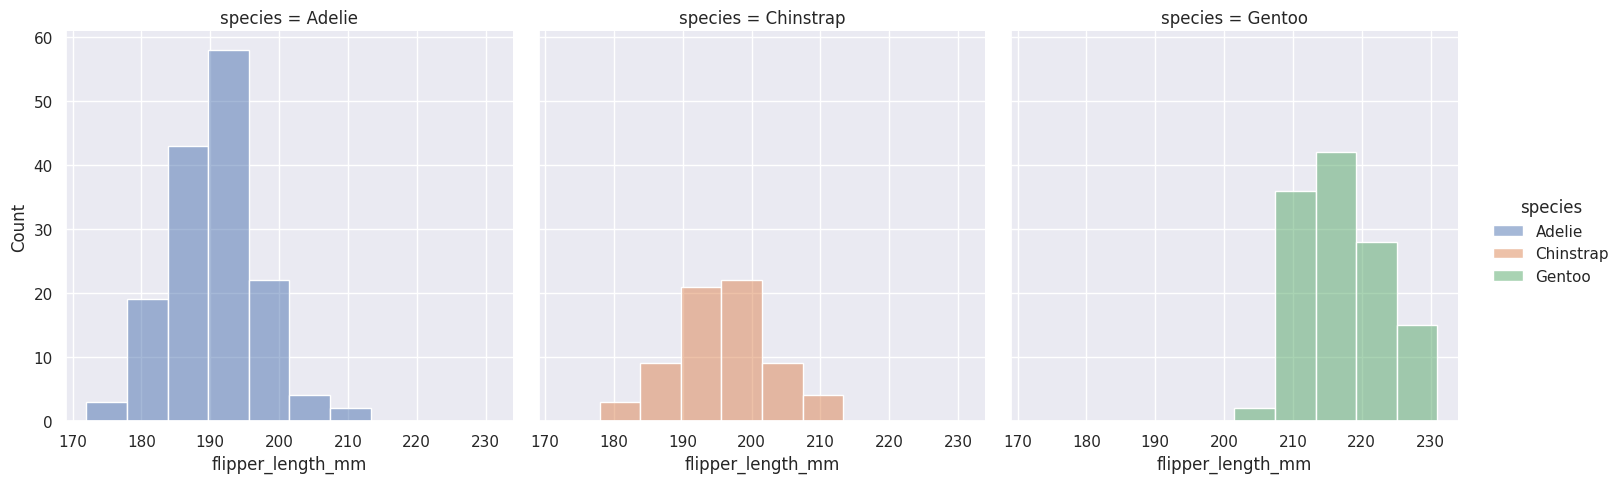

In [6]:
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    col="species"
)

The figure-level functions wrap their axes-level counterparts and pass the kind-specific keyword arguments (such as the bin size for a histogram) down to the underlying function. That means they are no less flexible, but there is a downside: the kind-specific parameters don’t appear in the function signature or docstrings. Some of their features might be less discoverable, and you may need to look at two different pages of the documentation before understanding how to achieve a specific goal.


## Axes-level functions make self-contained plots

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call **matplotlib.pyplot.gca()** internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:





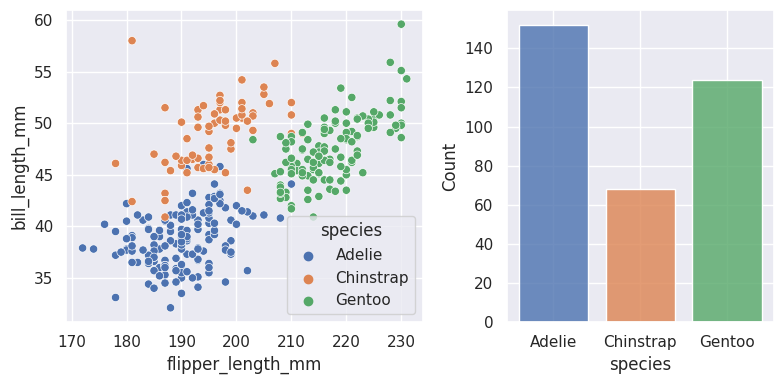

In [10]:
import matplotlib.pyplot as plt


f,axs = plt.subplots(1, 2, figsize=(8,4), gridspec_kw=dict(width_ratios=[4,3]))
sns.scatterplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    ax=axs[0])
sns.histplot(
    data=penguins,
    x="species",
    hue="species",
    shrink=0.8,
    alpha=0.8,
    legend=False,
    ax=axs[1])
f.tight_layout()


## Figure-level functions own their figure

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

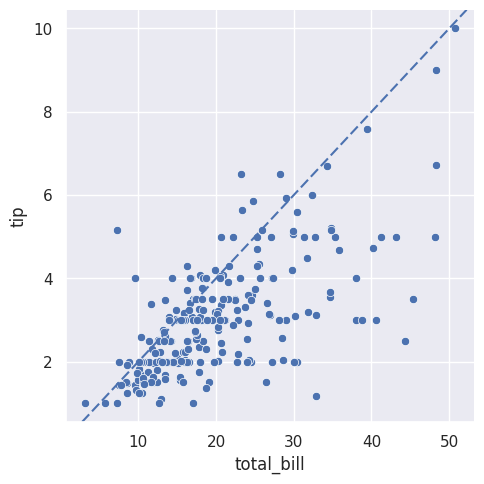

In [11]:
tips = sns.load_dataset("tips")
g = sns.relplot(
    data=tips,
    x="total_bill",
    y="tip")
g.ax.axline(
    xy1=(10, 2),
    slope=.2, color="b",
    dashes=(5, 2))

##Customizing plots from a figure-level function
The figure-level functions return a **FacetGrid** instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code:

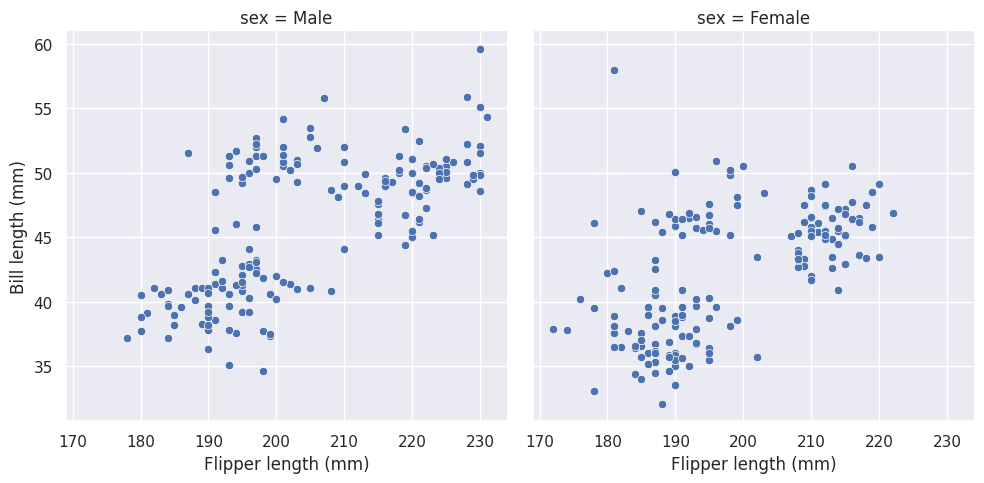

In [12]:
g = sns.relplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

While convenient, this does add a bit of extra complexity, as you need to remember that this method is not part of the matplotlib API and exists only when using a figure-level function.



## Specifying figure sizes
To increase or decrease the size of a matplotlib plot, you set the width and height of the entire figure, either in the global rcParams, while setting up the plot (e.g. with the figsize parameter of **matplotlib.pyplot.subplots())**, or by calling a method on the figure object (e.g. **matplotlib.Figure.set_size_inches()**). When using an axes-level function in seaborn, the same rules apply: the size of the plot is determined by the size of the figure it is part of and the axes layout in that figure.

When using a figure-level function, there are several key differences. First, the functions themselves have parameters to control the figure size (although these are actually parameters of the underlying **FacetGrid** that manages the figure). Second, these parameters, *height* and *aspect*, parameterize the size slightly differently than the *width*, *height* parameterization in matplotlib (using the seaborn parameters, *width* = *height* ** aspect*). Most importantly, the parameters correspond to the size of each subplot, rather than the size of the overall figure.

To illustrate the difference between these approaches, here is the default output of **matplotlib.pyplot.subplots()**with one subplot:



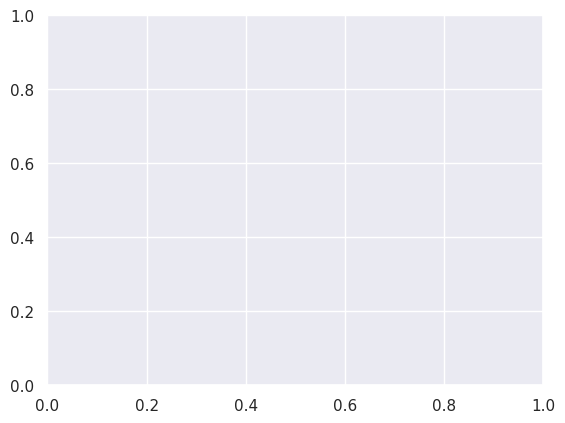

In [13]:
f, ax = plt.subplots()

A figure with multiple columns will have the same overall size, but the axes will be squeezed horizontally to fit in the space:

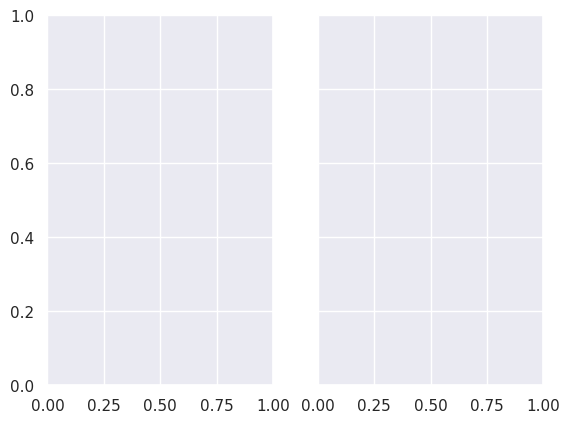

In [14]:
f, ax = plt.subplots(1,2, sharey=True)

In contrast, a plot created by a figure-level function will be square. To demonstrate that, let’s set up an empty plot by using **FacetGrid** directly. This happens behind the scenes in functions like **relplot()**, **displot()**, or **catplot()**:



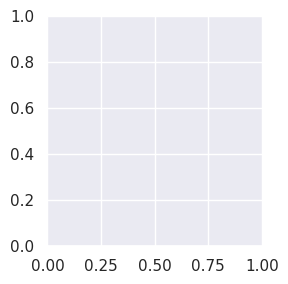

In [15]:
g = sns.FacetGrid(penguins)

When additional columns are added, the figure itself will become wider, so that its subplots have the same size and shape:

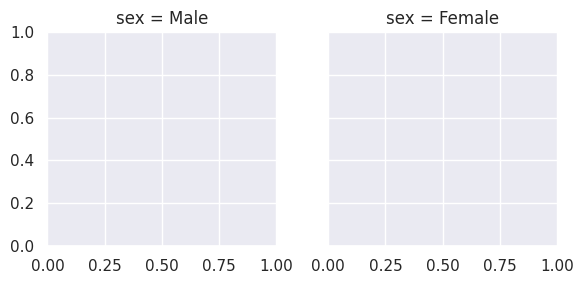

In [16]:
g = sns.FacetGrid(penguins,col="sex")

And you can adjust the size and shape of each subplot without accounting for the total number of rows and columns in the figure:



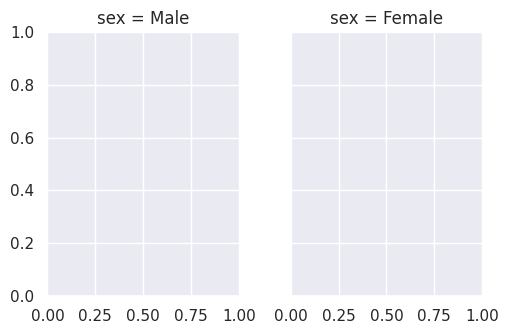

In [17]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)


The upshot is that you can assign faceting variables without stopping to think about how you’ll need to adjust the total figure size. A downside is that, when you do want to change the figure size, you’ll need to remember that things work a bit differently than they do in matplotlib.



## Relative merits of figure-level functions

Here is a summary of the pros and cons that we have discussed above:

Pros:

* Easy faceting by data variables
* Legend outside of plot by default
* Easy figure-level customization
* Different figure size parameterization

Cons:

* Many parameters not in function signature
* Cannot be part of a larger matplotlib figure
* Different API from matplotlib
* Different figure size parameterization

On balance, the figure-level functions add some additional complexity that can make things more confusing for beginners, but their distinct features give them additional power. The tutorial documentation mostly uses the figure-level functions, because they produce slightly cleaner plots, and we generally recommend their use for most applications. The one situation where they are not a good choice is when you need to make a complex, standalone figure that composes multiple different plot kinds. At this point, it’s recommended to set up the figure using matplotlib directly and to fill in the individual components using axes-level functions.

## Combining multiple views on the data

Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, **jointplot()** and **pairplot()**, employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: **JointGrid** and **PairGrid**, respectively.

**jointplot()** plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:


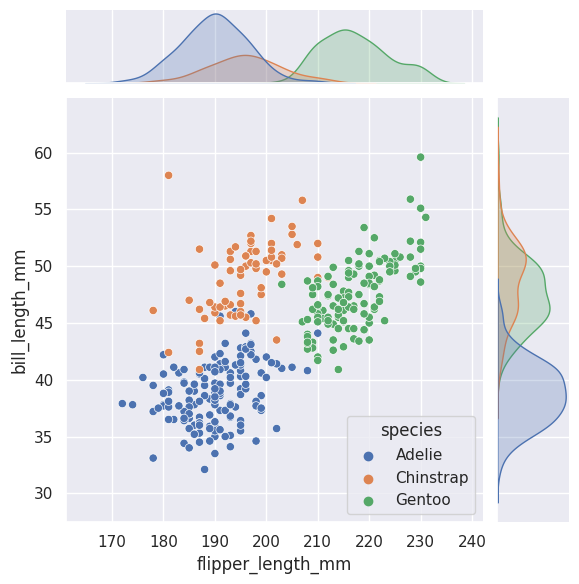

In [18]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species")

**pairplot()** is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:



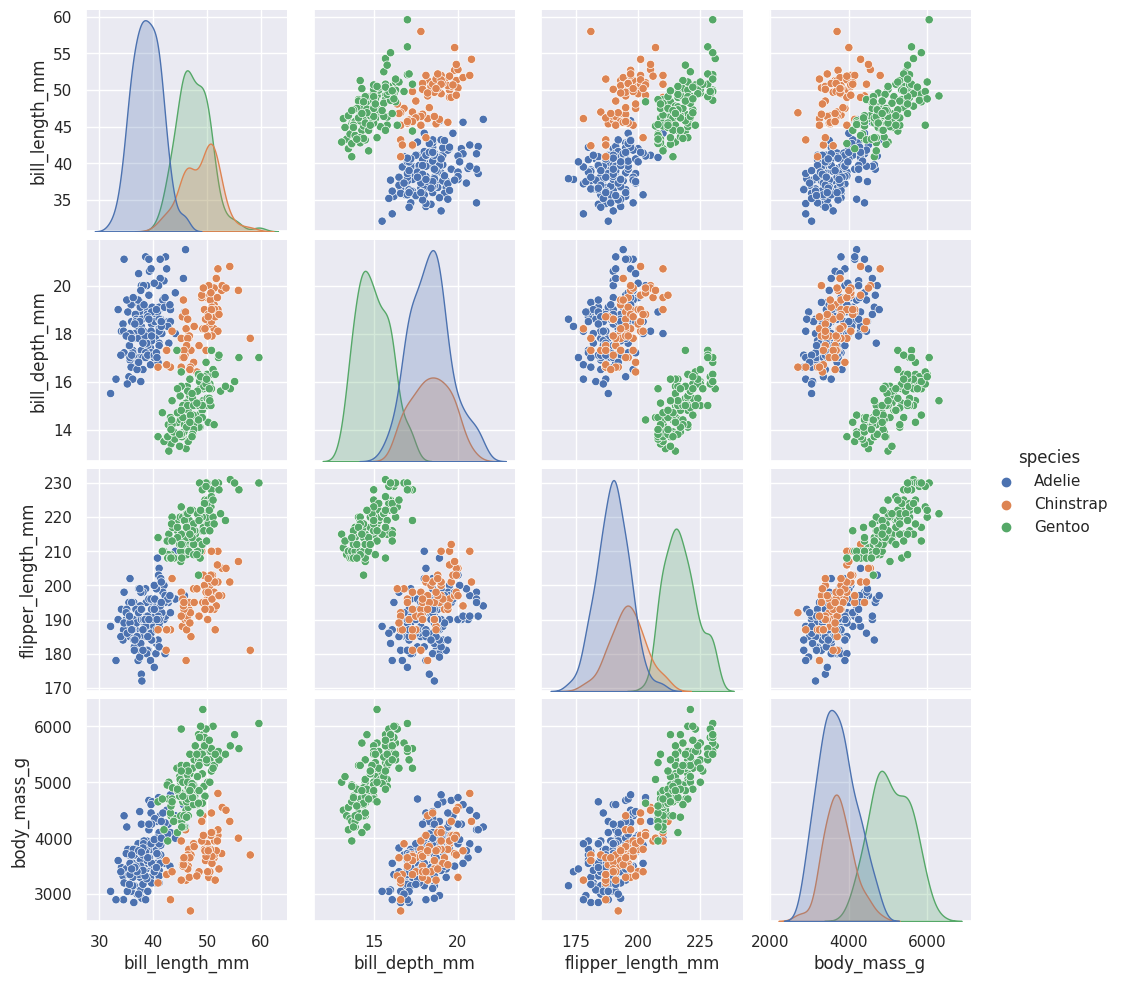

In [19]:
sns.pairplot(
    data=penguins,
    hue="species"
)

Behind the scenes, these functions are using axes-level functions that you have already met (**scatterplot()** and **kdeplot()**), and they also have a kind parameter that lets you quickly swap in a different representation:



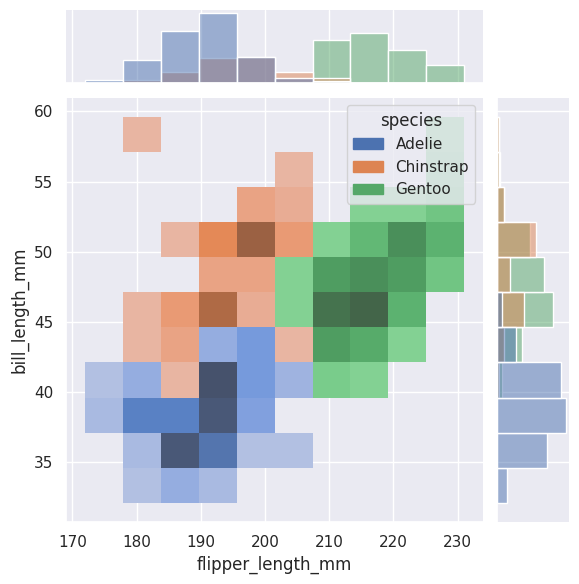

In [20]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    kind="hist")